# MACHINE LEARNING ASSIGNMENT-2

## PROBLEM STATEMENT

In this coursework we were asked to build a classifier which labels an article as being fact or opinion.

## BACKGROUND

In this coursework, we were asked to experiment with the given opinion and fact text dataset, and to explore deep learning, machine learning algorithms using python programming language including tasks like data exploration, text data pre-processing, deep learning and machine learning method selection and implementation, and model performance evaluation. The target variable - 'Label' provided to us is in categorical (i.e. of class Opinion or Fact) format. Hence, we would be dealing with supervised learning and classification type of deep learning and machine learning algorithms from the given text data.

## IMPORT LIBRARIES AND INPUT FILES

In [ ]:
# importing Libraries
import pickle5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import unidecode  # stripping accents from characters
import contractions  # fixes contractions such as `you're` to you `are`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import gensim
from tqdm import tqdm
from keras.preprocessing.sequence import pad_sequences
import os
import pickle
from gensim.models import KeyedVectors

from tensorflow.python import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
import re
from nltk.tokenize import word_tokenize

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
!pip install unidecode
!pip install contractions

%matplotlib inline

sns.set_style("darkgrid")


!pip install pickle5

# Reading CSV file
data = pd.read_csv("opinion_fact_news.csv")


     |████████████████████████████████| 235 kB 8.7 MB/s 
     |████████████████████████████████| 106 kB 7.0 MB/s 
     |████████████████████████████████| 287 kB 52.4 MB/s 
     |████████████████████████████████| 256 kB 7.6 MB/s 


In [ ]:
nltk.download("all")
ps = PorterStemmer()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
# !pip install spacy --upgrade
!python - m spacy download en_core_web_md


     |████████████████████████████████| 96.4 MB 1.7 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=98a351af887c9a9d27bf783571d7cac56c11bb3a1c60d7e709d15b5c539074dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-g_j7m6hc/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()
# nlp = spacy.load("en_core_web_md")


ModuleNotFoundError: No module named 'en_core_web_sm'

## DATA EXPLORATION

In [ ]:
data.head()


,title,body,label
0,Is Bernie Sanders really happening?,Watching Sanders surge to the front of the pac...,opinion
1,The London terror attack would’ve been much wo...,Two people were stabbed in Sunday’s attack in ...,opinion
2,The Super Bowl poses the question: What’s more...,But one debate overshadowed the rest: whether ...,opinion
3,"On health care, is Trump malicious or just inc...",While Democrats debate the best path to univer...,opinion
4,What ever happened to that ‘head on a pike’ st...,It was when Adam Schiff made a reference to so...,opinion


In [ ]:
# No of rows in dataset
print("No of rows in dataset ", len(data.index))
# datatypes of column
print(data.dtypes)


No of rows in dataset  10000
title    object
body     object
label    object
dtype: object


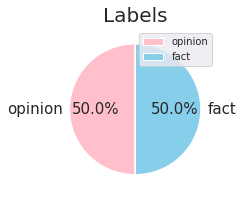

In [ ]:
# Plotting a pie chart for labels
# data is already balanced
label_df = data["label"]
plt.figure(figsize=(3, 3))
label_df.value_counts().plot(kind="pie", autopct="%1.1f%%", textprops={
    "fontsize": 15}, startangle=90, explode=(0.01, 0), colors=["pink", "skyblue"])
plt.title("Labels", fontsize=20)
plt.ylabel("")
plt.legend()


In [ ]:
# Null value check
data.isnull().sum()


title    0
body     0
label    0
dtype: int64

In [ ]:
# Combining body and title to make new column body_and_title
data["body_and_title"] = data["title"]+data["body"]


### WORD FREQUENCY ANALYSIS

In [ ]:
# Counting number of words in title , body and body_and_title
data["title_count"] = data["title"].apply(
    lambda x: len([len(w) for w in x.split()]))
data["body_count"] = data["body"].apply(
    lambda x: len([len(w) for w in x.split()]))
data["title_body_count"] = data["body_and_title"].apply(
    lambda x: len([len(w) for w in x.split()]))


In [ ]:
# average words in title
print("Average words in title :", data["title_count"].mean())
# average words in body
print("Average words in body :", data["body_count"].mean())
# average words in body and title
print("Average words in body_and_title :", data["title_body_count"].mean())
#Median in title
print("Median of title :", data["title_count"].median())
#Median in body
print("Median of body :", data["body_count"].median())
# median in body and title
print("Median of body_and_title :", data["title_body_count"].median())


Average words in title : 10.0894
Average words in body : 464.1251
Average words in body_and_title : 473.2145
Median of title : 10.0
Median of body : 432.0
Median of body_and_title : 442.0


### DIGIT ANALYSIS

In [ ]:
# new column numeric_count for no of digits in body_and_title
data["numeric_count"] = data["body_and_title"].str.count("\\b(\d{1,20})\\b")


In [ ]:
# checking numeric digits in facts
data_fact = data[data.label == "fact"]
print("Number of digits in fact :", data_fact["numeric_count"].sum())
# checking numeric digits in opinion
data_opinion = data[data.label == "opinion"]
print("Number of digits in opinion :", data_opinion["numeric_count"].sum())


Number of digits in fact : 75630
Number of digits in opinion : 28846


In [ ]:
# percentage of digits in opinion and fact
total_digit = 28846+75630
fact_percentage = (75630/total_digit)*100
print("Fact percentage :", fact_percentage)
opinion_percentage = (28846/total_digit)*100
print("Opinion Percentage :", opinion_percentage)


Fact percentage : 72.38983115739501
Opinion Percentage : 27.610168842605


In [ ]:
# number of words in both opinion and fact before preprocessing
text = " ".join(i for i in data.body).lower()

opinion_text = " ".join(
    i for i in data.loc[data["label"] == "opinion"].body).lower()

fact_text = " ".join(i for i in data.loc[data["label"] == "fact"].body).lower()

print("There are {} words in the combination of all opinions.".format(

    len(opinion_text.split())))

print("There are {} words in the combination of all facts.".format(

    len(fact_text.split())))


There are 2997946 words in the combination of all opinions.
There are 1643305 words in the combination of all facts.


### NUMBER TO WORD % ANALYSIS

In [ ]:
# number to word ratio
fact_number_to_word = (75630/1643305)*100
print("Number to word ratio for fact :", fact_number_to_word)
opinion_number_to_word = (28846/2997946)*100
print("Number to word ratio for opinion :", opinion_number_to_word)


Number to word ratio for fact : 4.602310587505058
Number to word ratio for opinion : 0.9621921142008562


### CHARACTER ANALYSIS

In [ ]:
# No of characters in data
data["character_count"] = data["body_and_title"].str.len()
char_fact = data[data.label == "fact"]
char_opinion = data[data.label == "opinion"]
print("Character count in fact  ", char_fact["character_count"].sum())
print("Character count in opinion  ", char_opinion["character_count"].sum())


Character count in fact   10576189
Character count in opinion   18659252


### WORD CLOUD (BEFORE PRE-PROCESSING)

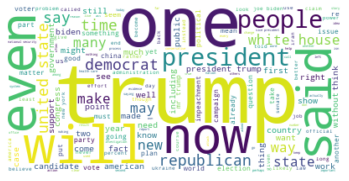

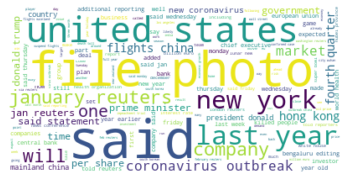

In [ ]:
# word cloud before pre-processing
# Generate a word cloud image
opinion_wordcloud = WordCloud(background_color="white").generate(opinion_text)
fact_wordcloud = WordCloud(background_color="white").generate(fact_text)

# Display the generated image:

plt.axis("off")
plt.imshow(opinion_wordcloud, interpolation="bilinear")
plt.show()

plt.axis("off")
plt.imshow(fact_wordcloud, interpolation="bilinear")
plt.show()


### TOP 15 WORDS

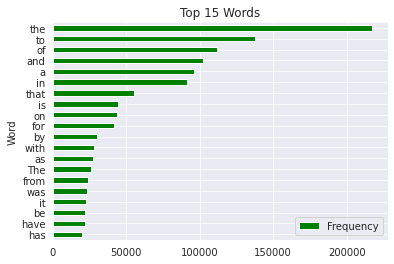

In [ ]:
# Top 15 words on CSV file before pre-processing

new_df_title = data.body_and_title.str.split(
    expand=True).stack().value_counts().reset_index()

new_df_title.columns = ["Word", "Frequency"]
new_df_title.head(20)
new_df_title = new_df_title[new_df_title.Frequency != 1]
df_new = new_df_title.head(20)
df_new = df_new.sort_values(by=["Frequency"])

# Plot a bar chart
df_new.plot.barh(x="Word", y="Frequency",
                 title="Top 15 Words", color="green")


### BIGRAMS EXPLORATION (BEFORE PRE-PROCESSING)

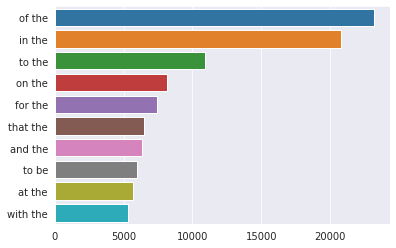

In [ ]:
# Bigram Data Exploration before pre-processing
def get_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]


bigram = get_bigram(data['body'], 2)[:10]
x, y = map(list, zip(*bigram))
sns.barplot(x=y, y=x)


## TEXT PRE-PROCESSING

Text preprocessing is a method to clean the text data and make it ready to feed data to the model. Text data contains noise in various forms like emotions, punctuation, text in a different case. When we talk about Human Language then, there are different ways to say the same thing, And this is only the main problem we have to deal with because machines will not understand words, they need numbers so we need to convert text to numbers in an efficient manner.

### CODE FOR PRE-PROCESSING

In [ ]:
text = " ".join(i for i in data.body).lower()
text += " ".join(i for i in data.title).lower()

text = (re.sub(r"[^a-zA-Z0-9]+", " ", text))
freq_dist = nltk.FreqDist(text.split())
# print(list(freq_dist.items())[:200])
one_time_words = []
for word, count in freq_dist.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if count == 1:
        one_time_words.append(word)

with open("one_time_words.pkl", "wb") as f:
    pickle.dump(one_time_words, f)
one_time_words = set(one_time_words)


def preprocessing(string):
    try:
        # remove single words that are proper nouns, then use nltk and tag your sentence in question,
        # would then remove all words with the tags that are proper nouns.

        tagged_sentence = nltk.tag.pos_tag(string.split())
        tokens = [word for word, tag in tagged_sentence if tag !=
                  "NNP" and tag != "NNPS"]
        string = " ".join(map(str, tokens))

        string = string.lower()

        # removing unicode "kožušček" to "kozuscek"
        string = unidecode.unidecode(string)

        # removing contractions they"re to they are
        string = contractions.fix(string)

        # removing special characters
        string = (re.sub(r"[^a-zA-Z0-9]+", " ", string))

        # removing stopwords except no and not as they are of value
        all_stopwords = nlp.Defaults.stop_words
        # for exception in ["not", "no"]:
        #     all_stopwords.discard(exception)

        text_tokens = word_tokenize(string)
        tokens_without_sw = [
            word for word in text_tokens if not word in all_stopwords]
        string = " ".join(map(str, tokens_without_sw))

        # one-time word removal
        string = " ".join(
            list(filter(lambda x: x not in one_time_words, string.split())))

        # removing words less than =3 characters
        string = re.sub(r"\b\w{1,3}\b", "", string)

        # lemmatizing each token
        doc = nlp(string)
        tokens_lemmatized = [word.lemma_ if word.lemma_ !=
                             "-PRON-" else word.lower_ for word in doc]
        string = " ".join(map(str, tokens_lemmatized))

        # stemming
        string = " ".join([ps.stem(word) for word in string.split()])

        # removing "say" explicitly as it occurs multiple times
        string = " ".join(
            list(filter(lambda x: x not in ["say"], string.split())))

        # removing numbers
        string = re.sub(r"\d+", "", string)

        # removing additional space from string
        string = re.sub(" +", " ", string)

    except Exception as e:
        print(string)
        print(e)

    return string


In [ ]:
import pickle5
!pip3 install pickle5


In [ ]:
if os.path.exists("preprocessed_test_updated_19042022_1600.pkl"):
    print("Loading from pickle")
    # pkl_df = pd.read_pickle("./preprocessed_test_updated_19042022_1600.pkl")
    with open("./preprocessed_test_updated_19042022_1600.pkl", "rb") as fh:
        pkl_df = pickle5.load(fh)

else:
    print("Running preprocessing")
    pkl_df = data.copy()
    pkl_df["title_and_body"] = pkl_df["title"] + " " + pkl_df["body"]

    pkl_df["title_and_body"] = pkl_df["title_and_body"].apply(
        preprocessing)  # pre processing of data

    pkl_df = pkl_df[["title_and_body", "label"]]
    pkl_df.replace({"opinion": 0, "fact": 1}, inplace=True)

    pkl_df.to_pickle("preprocessed_test_updated_19042022_1600.pkl")


# #Reading pickle file
# pb = pickle.PickleBuffer(b"preprocessed_test_updated_19042022_1600.pkl")

# data = pickle.dumps(pb, protocol=5)

# with open("preprocessed_test_updated_19042022_1600.pkl", "rb") as fh:
#     pkl_df = pickle.load(fh)


Loading from pickle


In [ ]:
pkl_df


,title_and_body,label
0,happen watch surg pack race thing turn preside...,0
1,terror attack bad assail peopl stab attack sou...,0
2,pose question obscen sexism debat overshadow r...,0
3,health care malici incompet debat good path un...,0
4,happen head pike stori refer report confid pre...,0
...,...,...
9995,top shrink list marin fuel supplier bunker uni...,1
9996,extend holiday employe till chines game giant ...,1
9997,unveil sustain athlet villag plaza world athl...,1
9998,novarti predict growth sale photo compani logo...,1


### BIGRAM EXPLORATION (AFTER PROCESSING)


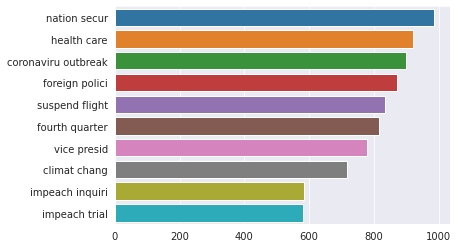

In [ ]:
# Bigram Data Exploration
def get_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]


bigram = get_bigram(pkl_df['title_and_body'], 2)[:10]
x, y = map(list, zip(*bigram))
sns.barplot(x=y, y=x)


### WORD FREQUENCY ANALYSIS (AFTER PRE-PROCESSING)

In [ ]:
# number of words in both opinion and fact after pre processing
text = " ".join(i for i in pkl_df.title_and_body).lower()

opinion_text = " ".join(
    i for i in pkl_df.loc[pkl_df["label"] == 0].title_and_body)

fact_text = " ".join(
    i for i in pkl_df.loc[pkl_df["label"] == 1].title_and_body)

print("There are {} words in the combination of all opinions.".format(

    len(opinion_text.split())))

print("There are {} words in the combination of all facts.".format(

    len(fact_text.split())))


There are 1130635 words in the combination of all opinions.
There are 612770 words in the combination of all facts.


### WORD CLOUD (AFTER PRE-PROCESSING)

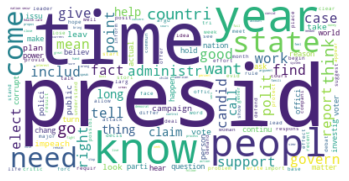

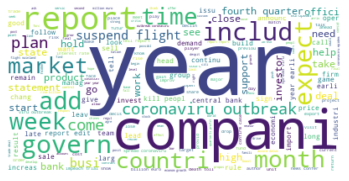

In [ ]:
# word cloud after pre-processing
# Generate a word cloud image
opinion_wordcloud = WordCloud(background_color="white").generate(opinion_text)
fact_wordcloud = WordCloud(background_color="white").generate(fact_text)

# Display the generated image:

plt.axis("off")
plt.imshow(opinion_wordcloud, interpolation="bilinear")
plt.show()

plt.axis("off")
plt.imshow(fact_wordcloud, interpolation="bilinear")
plt.show()


### TOP 15 WORDS (AFTER PRE-PROCESSING)

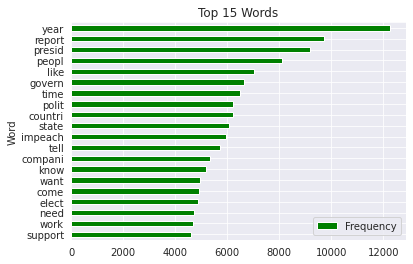

In [ ]:
#df["read_pickle_new"] = df["title"].str.lower().str.replace("[^\w\s]","")

new_df_title = pkl_df.title_and_body.str.split(
    expand=True).stack().value_counts().reset_index()

new_df_title.columns = ["Word", "Frequency"]


new_df_title.head(20)

#new_df_title = new_df_title[new_df_title.Frequency != 1]

df_new = new_df_title.head(20)

df_new = df_new.sort_values(by=["Frequency"])

# Plot bar
# Plot a bar chart
df_new.plot.barh(x="Word", y="Frequency",
                 title="Top 15 Words", color="green")


In [ ]:
# Top 15 words in opinion
opinion = pkl_df[pkl_df["label"] == 0]
new_df_opinion = opinion.title_and_body.str.split(
    expand=True).stack().value_counts().reset_index()

new_df_opinion.columns = ["Word", "Frequency"]


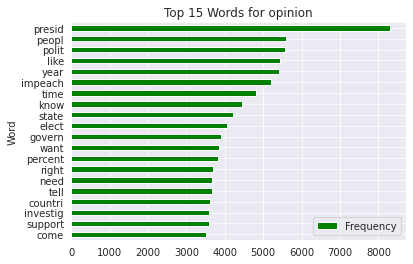

In [ ]:
df_new = new_df_opinion.head(20)

df_new = df_new.sort_values(by=["Frequency"])

# Plot bar
# Plot a bar chart
df_new.plot.barh(x="Word", y="Frequency",
                 title="Top 15 Words for opinion", color="green")


In [ ]:
# Top 15 words for fact
fact = pkl_df[pkl_df["label"] == 1]
new_df_fact = fact.title_and_body.str.split(
    expand=True).stack().value_counts().reset_index()

new_df_fact.columns = ["Word", "Frequency"]


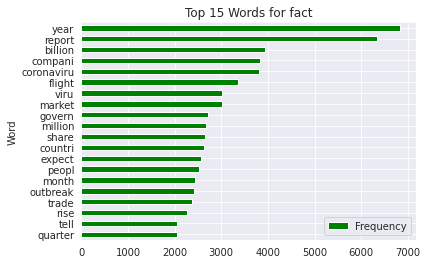

In [ ]:
df_new = new_df_fact.head(20)

df_new = df_new.sort_values(by=["Frequency"])

# Plot bar
# Plot a bar chart
df_new.plot.barh(x="Word", y="Frequency",
                 title="Top 15 Words for fact", color="green")


In [ ]:
# !pip install gensim --upgrade


## WORD2VEC MODEL

In [ ]:
# word2vec
import gensim
from gensim.models.word2vec import Word2Vec

nlp_tokenise_title_and_body = [
    nltk.word_tokenize(i) for i in pkl_df["title_and_body"]]
model_title_and_body = Word2Vec(nlp_tokenise_title_and_body,
                                sg=1,
                                window=3,
                                min_count=1,
                                workers=4,
                                iter=1)

model_title_and_body.save("word2vec_mod_final.model")


## WORD2VEC+BIGRAM MODEL

In [ ]:
# word2vec bigram
from gensim.models import Phrases

nlp_tokenise_title_and_body = [
    nltk.word_tokenize(i) for i in pkl_df["title_and_body"]]
bigram_transformer = Phrases(nlp_tokenise_title_and_body)
model_title_and_body_bigram = Word2Vec(bigram_transformer[nlp_tokenise_title_and_body],
                                       sg=1,
                                       window=3,
                                       min_count=1,
                                       workers=4,
                                       iter=1)

model_title_and_body_bigram.save("word2vec_mod_final_w2vbigram.model")


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Loading word2vec_mod_final_w2vbigram.model file
model_w2vbigram = gensim.models.Word2Vec.load(
    "word2vec_mod_final_w2vbigram.model")


In [ ]:
# Loading word2vec_mod_final.model file
model_word2vec = gensim.models.Word2Vec.load("word2vec_mod_final.model")


In [ ]:
# word2vec
model_word2vec.init_sims(replace=True)
model_result1 = model_word2vec.wv.most_similar("coronaviru", topn=10)
print(model_result1)


[('viru', 0.9551759958267212), ('outbreak', 0.9251859188079834), ('epidem', 0.9110772609710693), ('spread', 0.8781943321228027), ('fast', 0.8684191703796387), ('deadli', 0.8656318783760071), ('rapidli', 0.8602554798126221), ('symptom', 0.8566564321517944), ('epicentr', 0.8533542156219482), ('novel', 0.8530726432800293)]


In [ ]:
model_word2vec


In [ ]:
# word2vecbigram
model_w2vbigram.init_sims(replace=True)
model_result2 = model_w2vbigram.wv.most_similar("coronaviru", topn=10)
print(model_result2)


[('viru', 0.9735403060913086), ('infect', 0.9576020240783691), ('outbreak', 0.9275250434875488), ('confirm_case', 0.9223762154579163), ('kill_peopl', 0.9198173880577087), ('coronaviru_outbreak', 0.9130592346191406), ('provinc', 0.9070204496383667), ('death', 0.9053728580474854), ('spread', 0.9037443995475769), ('countri_region', 0.8898818492889404)]


In [ ]:
model_w2vbigram


In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype="f")
    word_labels = [word]
    color_list = ["red"]

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append("blue")
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append("green")
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=21).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0,
             perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                       "y": [y for y in Y[:, 1]],
                       "words": word_labels,
                       "color": color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={"s": 40,
                                  "facecolors": df["color"]
                                  }
                     )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                "  " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
                ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title("t-SNE visualization for {}".format(word.title()))


### SIMILAR WORDS VS. 10 DISSIMILAR WORDS

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


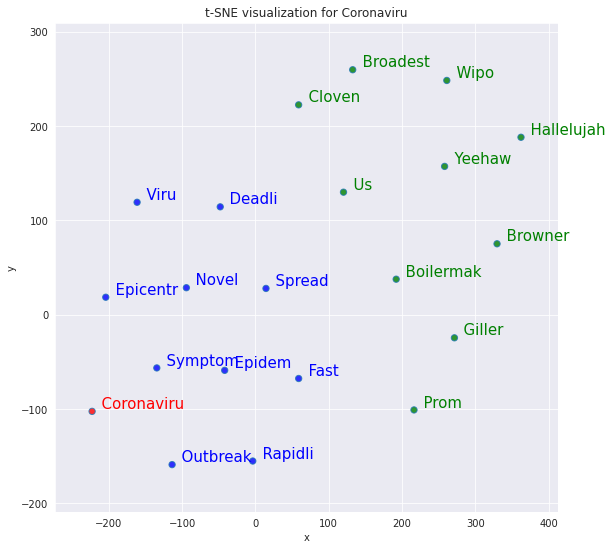

In [ ]:
# 10 Most similar words vs. 10 Most dissimilar
# To make the visualizations more relevant, we will look at the relationships between a query word (in **red**),
# its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).
tsnescatterplot(model_word2vec, "coronaviru", [
                i[0] for i in model_word2vec.wv.most_similar(negative=["coronaviru"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


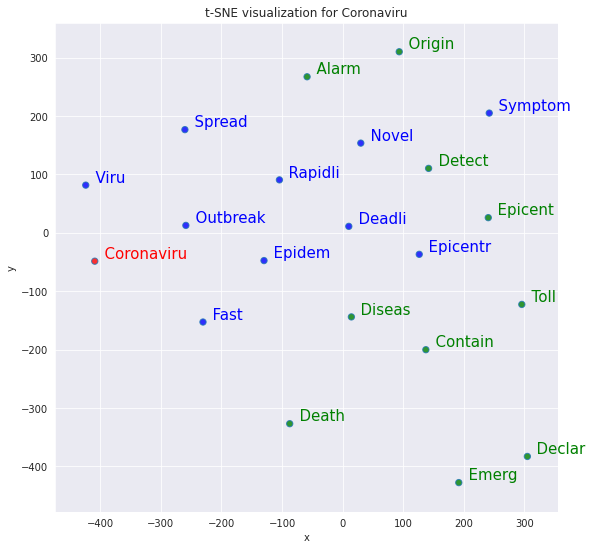

In [ ]:
tsnescatterplot(model_word2vec, "coronaviru", [
                t[0] for t in model_word2vec.wv.most_similar(positive=["coronaviru"], topn=20)][10:])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


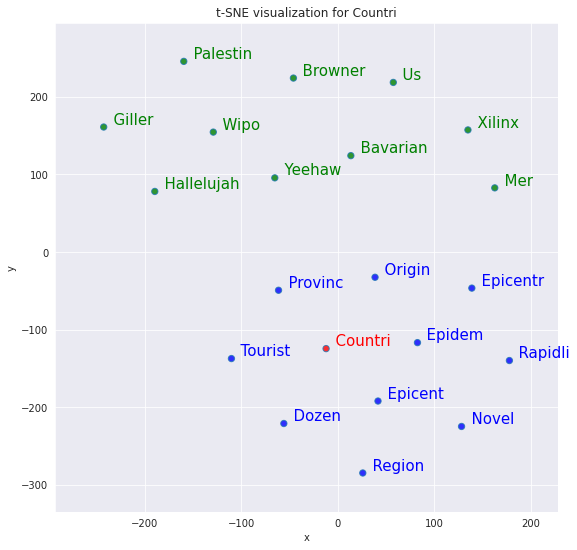

In [ ]:
# countri
tsnescatterplot(model_word2vec, "countri", [
                i[0] for i in model_word2vec.wv.most_similar(negative=["countri"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


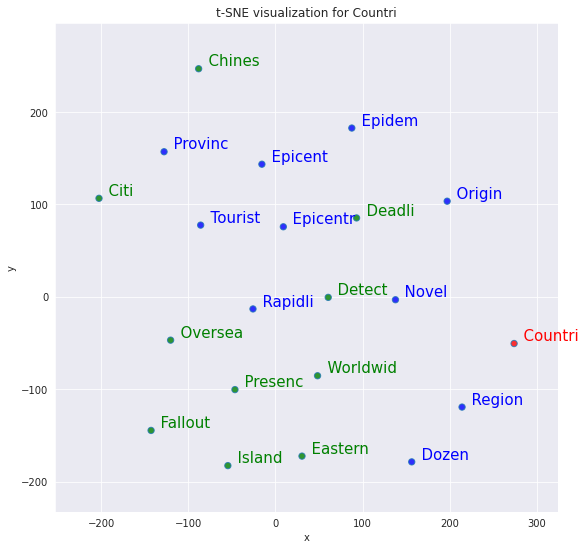

In [ ]:
tsnescatterplot(model_word2vec, "countri", [
                t[0] for t in model_word2vec.wv.most_similar(positive=["countri"], topn=20)][10:])


### SIMILAR WORDS VS. 10 DISSIMILAR WORDS WITH WORDS2VEC+BIGRAMS

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


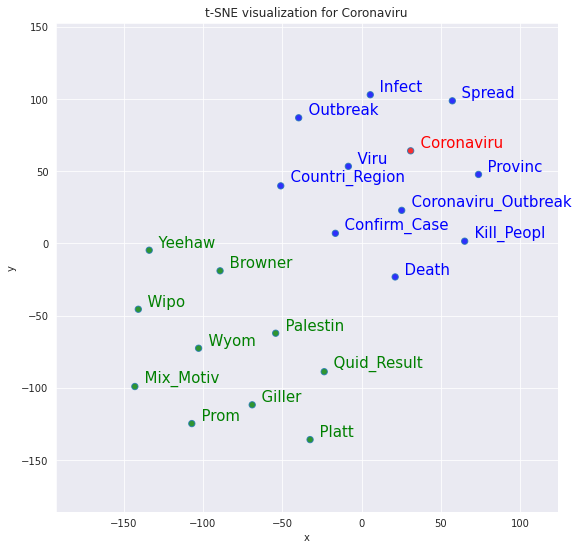

In [ ]:
# 10 Most similar words vs. 10 Most dissimilar
# To make the visualizations more relevant, we will look at the relationships between a query word (in **red**),
# its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).
tsnescatterplot(model_w2vbigram, "coronaviru", [
                i[0] for i in model_w2vbigram.wv.most_similar(negative=["coronaviru"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


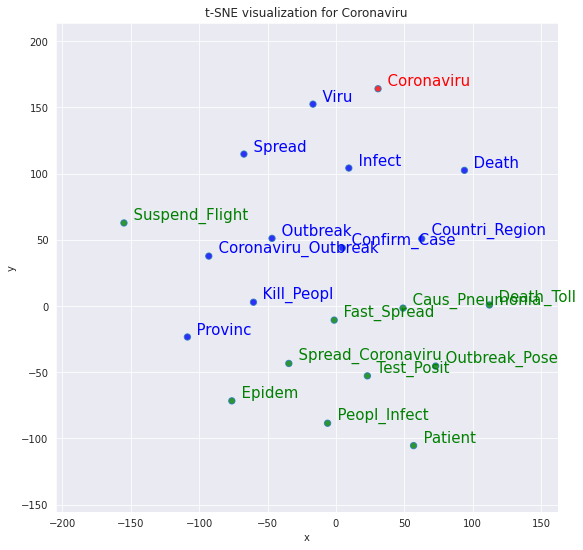

In [ ]:
tsnescatterplot(model_w2vbigram, "coronaviru", [
                t[0] for t in model_w2vbigram.wv.most_similar(positive=["coronaviru"], topn=20)][10:])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


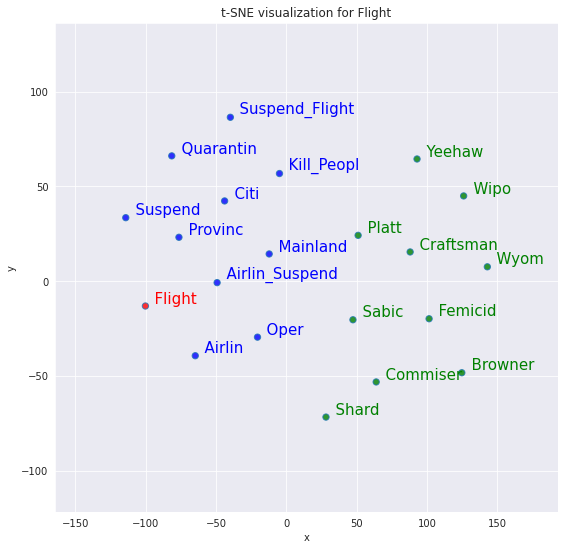

In [ ]:
# flight
tsnescatterplot(model_w2vbigram, "flight", [
                i[0] for i in model_w2vbigram.wv.most_similar(negative=["flight"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


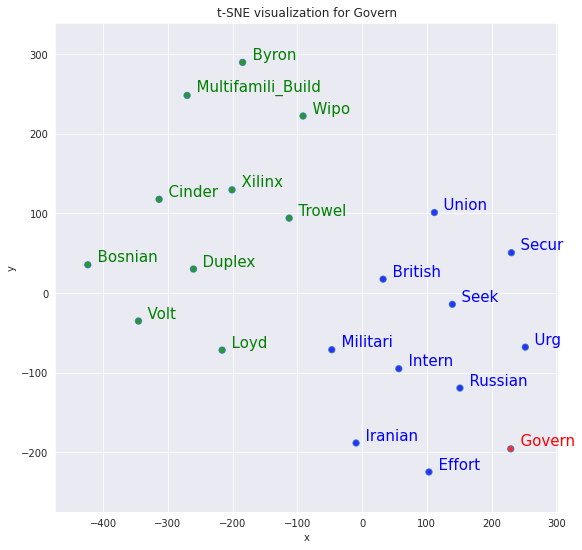

In [ ]:
# govern
tsnescatterplot(model_w2vbigram, "govern", [
                i[0] for i in model_w2vbigram.wv.most_similar(negative=["govern"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


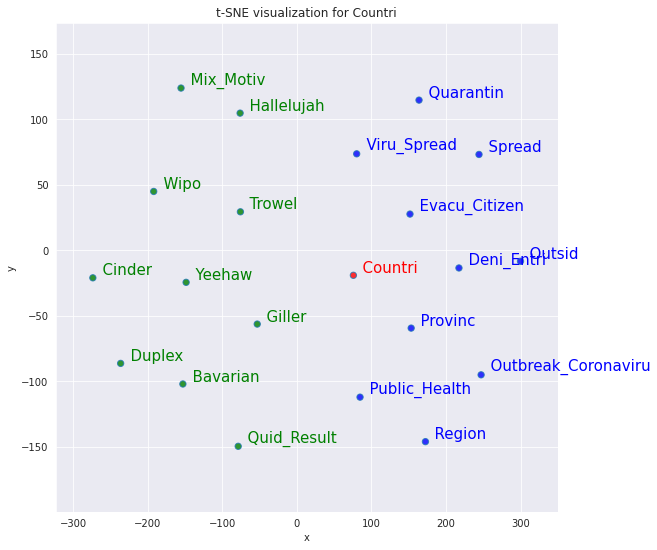

In [ ]:
# countri
tsnescatterplot(model_w2vbigram, "countri", [
                i[0] for i in model_w2vbigram.wv.most_similar(negative=["countri"])])


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


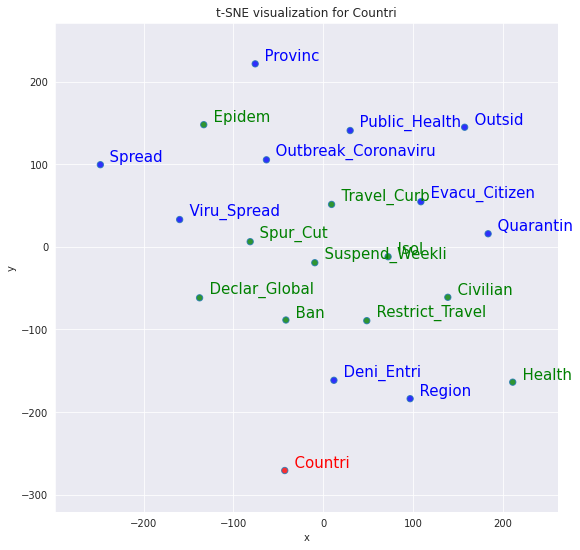

In [ ]:
tsnescatterplot(model_w2vbigram, "countri", [
                t[0] for t in model_w2vbigram.wv.most_similar(positive=["countri"], topn=20)][10:])


## SPLITTING THE DATA

In [ ]:
# 80:20 split data
from sklearn.model_selection import train_test_split
features = pkl_df.drop("label", axis=1)
labels = pkl_df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, shuffle=True)
print("Data distribution:\n- Train: {} \n- Test: {}".format(len(X_train), len(X_test)))


Data distribution:
- Train: 8000 
- Test: 2000


## CREATING TF-IDF

In [ ]:
# Creating tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer


def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)


In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train["title_and_body"])
X_train = vectorize(X_train["title_and_body"], tfidf_vect_fit)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_test = vectorize(X_test["title_and_body"], tfidf_vect_fit)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# creating pickle file for tf-idf
tfidf_vect_fit = tfidf_vect.fit(pkl_df["title_and_body"])
pickle.dump(tfidf_vect_fit, open("tfidf.pickle", "wb"))


In [ ]:
roc_auc_models = []


In [ ]:
# Custom function to display model metrics
from IPython.display import display
import seaborn as sns


def evaluate_model_metrics(name, X_train, X_test, y_train, y_test, y_pred, model):
    accuracy = str(round((accuracy_score(y_test, y_pred)), 3))
    training_score = str(
        round((accuracy_score(y_train, np.where(model.predict(X_train) > 0.5, 1, 0))), 3))
    roc_auc = str(round((roc_auc_score(y_test, y_pred)), 3))
    precision = str(round((precision_score(y_test, y_pred)), 3))
    recall = str(round((recall_score(y_test, y_pred)), 3))
    f1_score_val = str(round((f1_score(y_test, y_pred)), 3))
    confusion_matrix_val = pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        columns=[
            "Predicted: False", "Predicted: True",
        ], index=[
            "False", "True", ]
    )

    print("Accuracy: " + accuracy + "\nTraining Score: " + training_score)
    print("Area Under the Receiver Operating Characteristic Curve (ROC AUC): " +
          roc_auc + "\nPrecision: " + precision)
    print("Recall: " + recall + "\nF1-Score: " + f1_score_val)
    print("\nClassification Report:")
    display(pd.DataFrame(classification_report(
        y_test, y_pred, output_dict=True)).transpose())
    print("Confusion Matrix:")
    display(confusion_matrix_val)

    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, cmap="Blues")
    ax.set_title("Confusion Matrix for " + name + "\n\n")
    ax.set_xlabel("\nPredicted Values")
    ax.set_ylabel("Actual Values")
    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(["False", "True"])
    ax.yaxis.set_ticklabels(["False", "True"])
    # Display the visualization of the Confusion Matrix.
    plt.show()

    # Plotting ROC-AUC Curve
    r_probs = [0 for _ in range(len(y_test))]
    rf_probs = model.predict(X_test)
    rf_probs = list(np.array(rf_probs).ravel())

    r_auc = roc_auc_score(y_test, r_probs)
    rf_auc = roc_auc_score(y_test, rf_probs)
    print("Random (chance) Prediction: AUROC = %.3f" % (r_auc))
    print(name+": AUROC = %.3f" % (rf_auc))
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
    plt.figure(figsize=(6, 6))
    plt.plot(rf_fpr, rf_tpr, marker=".",
             label=name+" (AUROC = %0.3f)" % rf_auc)
    global roc_auc_models
    roc_auc_models.append([name, rf_fpr, rf_tpr, rf_auc])
    # rf_fpr, rf_tpr, rf_auc
    plt.plot(r_fpr, r_tpr, linestyle="--",
             label="Random prediction (AUROC = %0.3f)" % r_auc)
    plt.title("ROC Plot")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    np_result = np.array(list(
        map(float, [accuracy, training_score, roc_auc, precision, recall, f1_score_val])))
    return pd.Series({"model": name, "accuracy": np_result[0],
                      "training_score": np_result[1], "roc_auc": np_result[2],
                      "precision": np_result[3], "recall": np_result[4], "f1_score": np_result[5]})


# Initializing a data frame to store model scores
model_scores = pd.DataFrame(columns=[
                            "model", "accuracy", "training_score", "roc_auc", "precision", "recall", "f1_score"])


## MODEL IMPLEMENTATION WITH RESULTS

### RANDOM FOREST

Accuracy: 0.864
Training Score: 0.874
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.865
Precision: 0.82
Recall: 0.93
F1-Score: 0.872

Classification Report:


,precision,recall,f1-score,support
0,0.921502,0.800395,0.856690,1012.0000
1,0.819804,0.930162,0.871503,988.0000
accuracy,0.864500,0.864500,0.864500,0.8645
macro avg,0.870653,0.865279,0.864096,2000.0000
weighted avg,0.871263,0.864500,0.864007,2000.0000


Confusion Matrix:


,Predicted: False,Predicted: True
False,810,202
True,69,919


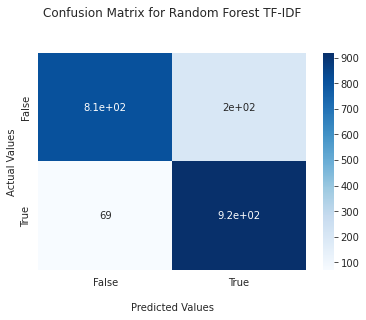

Random (chance) Prediction: AUROC = 0.500
Random Forest TF-IDF: AUROC = 0.865


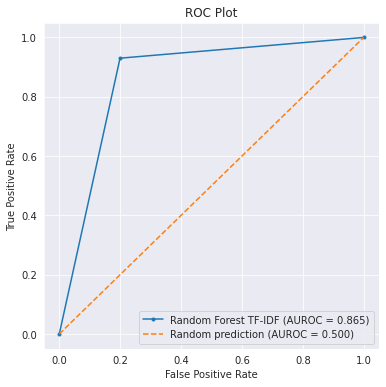

In [ ]:
# Random Forest Classifier
random_clf = RandomForestClassifier(
    max_depth=4, min_samples_leaf=30, min_samples_split=5, random_state=1)
# Fitting training data
random_clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = random_clf.predict(X_test)

model_scores = model_scores.append(evaluate_model_metrics(
    "Random Forest TF-IDF", X_train_countVect1, X_test, y_train, y_test, y_pred, mnb1), ignore_index=True)


Hyperparameter tuning for Random Forest

Loaded optimized model from pickle
Accuracy: 0.874
Training Score: 0.883
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.874
Precision: 0.834
Recall: 0.929
F1-Score: 0.879

Classification Report:


,precision,recall,f1-score,support
0,0.922136,0.81917,0.867609,1012.0000
1,0.833787,0.92915,0.878889,988.0000
accuracy,0.873500,0.87350,0.873500,0.8735
macro avg,0.877962,0.87416,0.873249,2000.0000
weighted avg,0.878492,0.87350,0.873181,2000.0000


Confusion Matrix:


,Predicted: False,Predicted: True
False,829,183
True,70,918


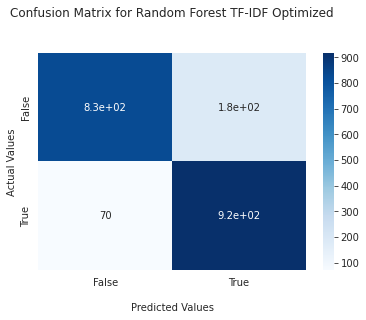

Random (chance) Prediction: AUROC = 0.500
Random Forest TF-IDF Optimized: AUROC = 0.874


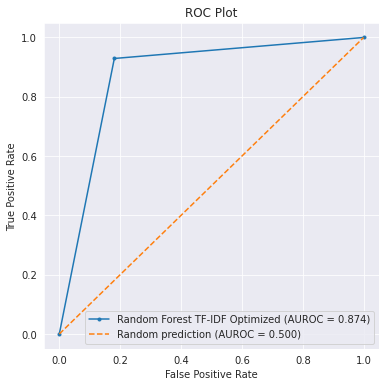

In [ ]:
if os.path.exists("rf_model_grid.best_estimator_96_21042022.pkl"):
    with open("./rf_model_grid.best_estimator_96_21042022.pkl", "rb") as fh:
        rf_model_grid_best_estimator_ = pickle5.load(fh)
    print("Loaded optimized model from pickle")

else:
    params = [{'max_depth': [2, 4, 6], 'min_samples_leaf': [
        5, 10, 15], 'min_samples_split': [5, 10, 15, ]}]
    rf_model_grid = GridSearchCV(
        RandomForestClassifier(), param_grid=params, cv=3, verbose=5)
    rf_model_grid.fit(X_train, y_train)
    print('Best Parameters : ', rf_model_grid.best_params_)
    print('Best Estimators : ', rf_model_grid.best_estimator_)
    rf_model_grid_best_estimator_ = rf_model_grid.best_estimator_
    pickle5.dump(rf_model_grid_best_estimator_, open(
        "rf_model_grid.best_estimator_96_21042022.pkl", "wb"))


ypred_rf_tuned = rf_model_grid_best_estimator_.predict(X_test)
model_scores = model_scores.append(evaluate_model_metrics(
    "Random Forest TF-IDF Optimized", X_train, X_test, y_train, y_test, ypred_rf_tuned, rf_model_grid_best_estimator_), ignore_index=True)


In [ ]:
model_scores


,model,accuracy,training_score,roc_auc,precision,recall,f1_score
0,Random Forest TF-IDF,0.864,0.874,0.865,0.820,0.930,0.872
1,Random Forest TF-IDF Optimized,0.874,0.883,0.874,0.834,0.929,0.879


### NAIVE BAYES

Accuracy: 0.948
Training Score: 0.946
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.948
Precision: 0.979
Recall: 0.915
F1-Score: 0.946

Classification Report:


,precision,recall,f1-score,support
0,0.922006,0.981225,0.950694,1012.0000
1,0.979415,0.914980,0.946102,988.0000
accuracy,0.948500,0.948500,0.948500,0.9485
macro avg,0.950710,0.948103,0.948398,2000.0000
weighted avg,0.950366,0.948500,0.948425,2000.0000


Confusion Matrix:


,Predicted: False,Predicted: True
False,993,19
True,84,904


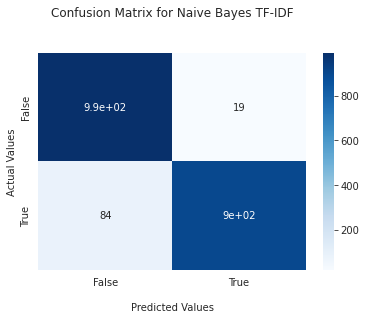

Random (chance) Prediction: AUROC = 0.500
Naive Bayes TF-IDF: AUROC = 0.948


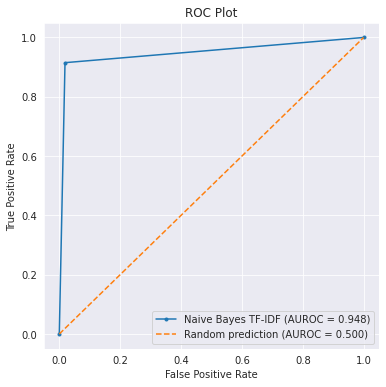

In [ ]:
nb_model = MultinomialNB()

# Fitting training data
nb_model.fit(X_train, y_train)

# Predict the response for test dataset
ypred_nb = nb_model.predict(X_test)

model_scores = model_scores.append(evaluate_model_metrics(
    "Naive Bayes TF-IDF", X_train, X_test, y_train, y_test, ypred_nb, nb_model), ignore_index=True)


Hyperparameter tuning for Naive Bayes

Optimized Model :  MultinomialNB(alpha=0.01)
Accuracy: 0.96
Training Score: 0.966
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.96
Precision: 0.985
Recall: 0.934
F1-Score: 0.959

Classification Report:


,precision,recall,f1-score,support
0,0.938852,0.986166,0.961928,1012.0000
1,0.985059,0.934211,0.958961,988.0000
accuracy,0.960500,0.960500,0.960500,0.9605
macro avg,0.961956,0.960188,0.960444,2000.0000
weighted avg,0.961678,0.960500,0.960462,2000.0000


Confusion Matrix:


,Predicted: False,Predicted: True
False,998,14
True,65,923


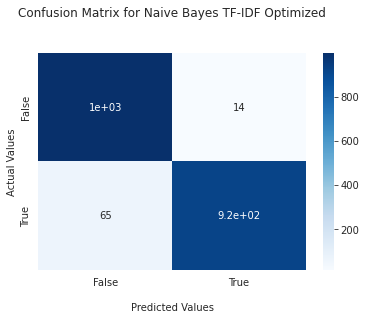

Random (chance) Prediction: AUROC = 0.500
Naive Bayes TF-IDF Optimized: AUROC = 0.960


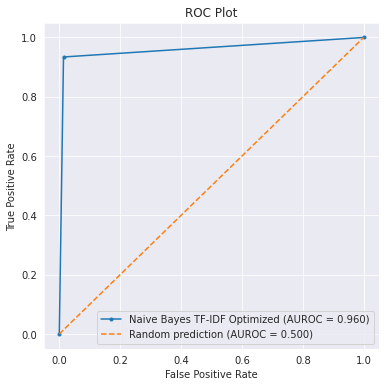

In [ ]:
if os.path.exists("nb_model_grid.best_estimator_96_21042022.pkl"):
    with open("./nb_model_grid.best_estimator_96_21042022.pkl", "rb") as fh:
        nb_model_grid_best_estimator_ = pickle5.load(fh)
    print('Optimized Model : ', nb_model_grid_best_estimator_)

else:
    params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ], }
    nb_model_grid = GridSearchCV(
        MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
    nb_model_grid.fit(X_train, y_train)
    print('Best Parameters : ', nb_model_grid.best_params_)
    print('Best Estimators : ', nb_model_grid.best_estimator_)
    nb_model_grid_best_estimator_ = nb_model_grid.best_estimator_
    pickle5.dump(nb_model_grid_best_estimator_, open(
        "nb_model_grid.best_estimator_96_21042022.pkl", "wb"))

ypred_nb_tuned = nb_model_grid_best_estimator_.predict(X_test)
model_scores = model_scores.append(evaluate_model_metrics(
    "Naive Bayes TF-IDF Optimized", X_train, X_test, y_train, y_test, ypred_nb_tuned, nb_model_grid_best_estimator_), ignore_index=True)


In [ ]:
model_scores


,model,accuracy,training_score,roc_auc,precision,recall,f1_score
0,Random Forest TF-IDF,0.864,0.874,0.865,0.820,0.930,0.872
1,Random Forest TF-IDF Optimized,0.874,0.883,0.874,0.834,0.929,0.879
2,Naive Bayes TF-IDF,0.948,0.946,0.948,0.979,0.915,0.946
3,Naive Bayes TF-IDF Optimized,0.960,0.966,0.960,0.985,0.934,0.959


### LSTM WITH RANK OF WORD IN VOCAB VECTORIZATION

In [ ]:
data_y = pd.DataFrame(data=pkl_df["label"], columns=["label"])
data_x = pkl_df.drop(columns=["label"])
data_x.rename(columns={'title_and_body': 'text'}, inplace=True)
data_y.replace({"opinion": 0, "fact": 1}, inplace=True)

data_x.head()


,text
0,happen watch surg pack race thing turn preside...
1,terror attack bad assail peopl stab attack sou...
2,pose question obscen sexism debat overshadow r...
3,health care malici incompet debat good path un...
4,happen head pike stori refer report confid pre...


In [ ]:
data_y.head()


,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, train_size=0.80, random_state=50)
x_train, x_cv, y_train, y_cv = train_test_split(
    x_train, y_train, train_size=0.80, random_state=50)


In [ ]:
# Generating Vocabulary
vocab = {}
for i in tqdm(x_train['text'], position=0, leave=True):
    # for i in tqdm(data_x['text'],position=0,leave=True):
    for j in i.split():
        if j not in vocab:
            vocab[j] = 1
        else:
            vocab[j] += 1
vocab = sorted(vocab, key=vocab.get, reverse=True)
len(vocab)


100%|██████████| 6400/6400 [00:00<00:00, 14209.35it/s]


14943

In [ ]:
# Storing vocabulary for deployment
with open('vocab.pickle', 'wb') as handle:
    pickle.dump(vocab, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Vectorizing the data based on generated vocabulary
def vocab_vectorize(data, vocab):
    print("\nGenerating Vectors......")
    max_seq_len = 4000
    row = 0
    # converting sequence to vector...
    new_data = pd.DataFrame(columns=["text"])
    for i in tqdm(data['text'], position=0, leave=True):
        sent = []
        for j in i.split():
            try:
                sent.append((vocab.index(j))+1)
            except:
                continue
        new_data.loc[row] = [sent]
        row += 1
    new_data = sequence.pad_sequences(new_data['text'], maxlen=max_seq_len)
    return new_data  # if its CV/TEST data we return the numerical vectors computed w.r.t training vocab


In [ ]:
x_train_vec = vocab_vectorize(x_train, vocab)
x_cv_vec = vocab_vectorize(x_cv, vocab)
x_test_vec = vocab_vectorize(x_test, vocab)



Generating Vectors......


100%|██████████| 6400/6400 [00:41<00:00, 153.14it/s]



Generating Vectors......


100%|██████████| 1600/1600 [00:09<00:00, 160.57it/s]



Generating Vectors......


100%|██████████| 2000/2000 [00:12<00:00, 160.70it/s]


In [ ]:
y_cv


,label
3098,0
5730,1
4786,0
9199,1
5907,1
...,...
4773,0
351,0
7445,1
5582,1


In [ ]:
from keras.models import load_model
if os.path.exists("lstm_vocab_rank_model_96.2_20042022.h5"):
    print("Loading pre-trained model from pickle")
    lstm_model = load_model('lstm_vocab_rank_model_96.2_20042022.h5')
    with open("lstm_vocab_rank_model_96.2_20042022_values.pkl", "rb") as fh:
        values = pickle5.load(fh)

else:
    print("Training LSTM Model with custom vocab rank embedding")
    lstm_model = Sequential()
    # taking whole length of vocab
    lstm_model.add(Embedding(1+len(vocab), 20, input_length=4000))
    lstm_model.add(Dropout(0.8))  # Dropout introduced to reduce overfitting
    lstm_model.add(LSTM(25))
    lstm_model.add(Dropout(0.6))
    # https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
    lstm_model.add(Dense(1, activation='sigmoid'))
    lstm_model.compile(loss='binary_crossentropy',
                       optimizer='adam', metrics=['accuracy'])

    values = lstm_model.fit(x_train_vec, y_train, epochs=10, batch_size=500,
                            validation_data=(x_cv_vec, y_cv))

    with open("lst_vocab_rank_model_96.2_20042022_values.pkl", "wb") as f:
        pickle.dump(values.history, f)

    values = values.history
    lstm_model.save('lst_vocab_rank_model_96.2_20042022.h5')
    # Run time ~60 minutes


Loading pre-trained model from pickle


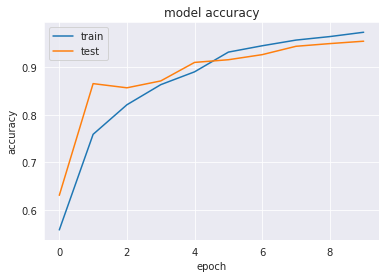

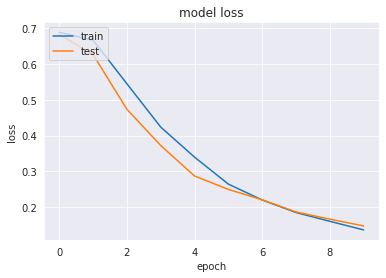

In [ ]:
# plot train and validation loss https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/
# Summarize history for accuracy
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Accuracy: 0.962
Training Score: 0.98
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.963
Precision: 0.967
Recall: 0.958
F1-Score: 0.962

Classification Report:


,precision,recall,f1-score,support
0,0.958333,0.966967,0.962631,999.0000
1,0.966734,0.958042,0.962368,1001.0000
accuracy,0.962500,0.962500,0.962500,0.9625
macro avg,0.962534,0.962504,0.962500,2000.0000
weighted avg,0.962538,0.962500,0.962499,2000.0000


Confusion Matrix:


,Predicted: False,Predicted: True
False,966,33
True,42,959


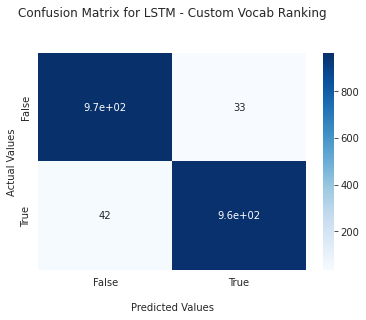

Random (chance) Prediction: AUROC = 0.500
LSTM - Custom Vocab Ranking: AUROC = 0.992


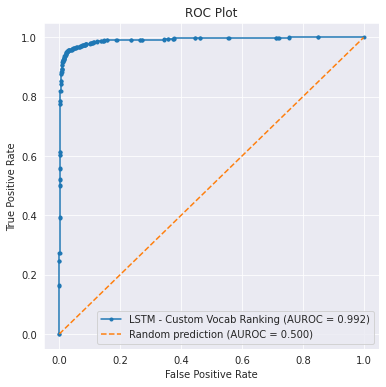

In [ ]:
# score, acc = lstm_model.evaluate(x_test_vec, y_test)
y_pred = lstm_model.predict(x_test_vec)
y_pred = np.where(y_pred > 0.5, 1, 0)

model_scores = model_scores.append(evaluate_model_metrics(
    "LSTM - Custom Vocab Ranking", x_train_vec, x_test_vec, y_train, y_test, y_pred, lstm_model), ignore_index=True)


In [ ]:
model_scores


,model,accuracy,training_score,roc_auc,precision,recall,f1_score
0,Random Forest TF-IDF,0.864,0.874,0.865,0.820,0.930,0.872
1,Random Forest TF-IDF Optimized,0.874,0.883,0.874,0.834,0.929,0.879
2,Naive Bayes TF-IDF,0.948,0.946,0.948,0.979,0.915,0.946
3,Naive Bayes TF-IDF Optimized,0.960,0.966,0.960,0.985,0.934,0.959
4,LSTM - Custom Vocab Ranking,0.962,0.980,0.963,0.967,0.958,0.962


### LSTM MODEL USING WORD2VEC


In [ ]:
# Reading from pickled preprocessed file
with open("preprocessed_test_updated_19042022_1600.pkl", "rb") as fh:
    df = pickle5.load(fh)

#df = pd.read_pickle("preprocessed_test_updated_19042022_1600.pkl")


In [ ]:
# Separating the output column
Y = df['label']
print(Y)
X = df['title_and_body']
print(X)


0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: label, Length: 10000, dtype: int64
0       happen watch surg pack race thing turn preside...
1       terror attack bad assail peopl stab attack sou...
2       pose question obscen sexism debat overshadow r...
3       health care malici incompet debat good path un...
4       happen head pike stori refer report confid pre...
                              ...                        
9995    top shrink list marin fuel supplier bunker uni...
9996    extend holiday employe till chines game giant ...
9997     unveil sustain athlet villag plaza world athl...
9998    novarti predict growth sale photo compani logo...
9999    russian order watchdog draw plan prevent viru ...
Name: title_and_body, Length: 10000, dtype: object


In [ ]:
# Splitting into test and train dataset for LSTM word2vec
X_train, X_rem, Y_train, Y_rem = train_test_split(
    X, Y, train_size=0.8, random_state=56)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(
    X_rem, Y_rem, test_size=0.5, random_state=56)
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)


(8000,)
(8000,)
(1000,)
(1000,)
(1000,)
(1000,)


(None, None)

In [ ]:
# Extracting Word2vec parameters
w2v_model = gensim.models.Word2Vec.load(
    "word2vec_mod_final.model")  # Loading word2vec model
print(type(w2v_model))
pretrained_weights = w2v_model.wv.vectors
vocab_size, emdedding_size = pretrained_weights.shape
print(pretrained_weights.shape)


<class 'gensim.models.word2vec.Word2Vec'>
(15793, 100)


In [ ]:
# GENEARTING VOCABULARY FROM TRAINING DATA

vocab = {}
for i in tqdm(X_train, position=0, leave=True):
    for j in i.split():
        if j not in vocab:
            vocab[j] = 1
        else:
            vocab[j] += 1
vocab = sorted(vocab, key=vocab.get, reverse=True)
print(len(vocab))


NameError: name 'tqdm' is not defined

In [ ]:
# Vectorising train , validation and test data
def vectorize(data, vocab):
    print("\nGenerating Vectors......")
    # Assigning a value higher than the longest sequence in the whole dataset
    max_seq_len = 4000
    row = 0
  # converting sequence to vector...
    new_data = pd.DataFrame(columns=["title_and_body"])
    for i in tqdm(data, position=0, leave=True):
        sent = []
        for j in i.split():
            try:
                sent.append((vocab.index(j))+1)
            except:
                continue
        new_data.loc[row] = [sent]
        row += 1
    new_data = pad_sequences(new_data['title_and_body'], maxlen=max_seq_len)
    return new_data  # if its CV/TEST data we return the numerical vectors computed w.r.t training vocab


x_train_vec = vectorize(X_train, vocab)
x_cv_vec = vectorize(X_valid, vocab)
x_test_vec = vectorize(X_test, vocab)



Generating Vectors......


100%|██████████| 8000/8000 [00:48<00:00, 165.04it/s]



Generating Vectors......


100%|██████████| 1000/1000 [00:05<00:00, 167.00it/s]



Generating Vectors......


100%|██████████| 1000/1000 [00:06<00:00, 162.75it/s]


In [ ]:
# Loading the pickled LSTM model using word2vec if it already exists
if os.path.exists('LSTM_w2v_model_final.h5'):
    print('Loading the model from pickle')
    lstm_w2v_mdl = keras.models.load_model('LSTM_w2v_model_final.h5')
    with open("LSTM_w2v_modelb25e5d7d5_adam.pkl", "rb") as fh:
        values = pickle5.load(fh)
    print('Model and values loaded successfully')
else:
    print('Training the LSTM model: ')
    lstm_w2v_mdl = Sequential()
    lstm_w2v_mdl.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[
                     pretrained_weights]))  # Adding the word2vec weights
    lstm_w2v_mdl.add(Dropout(0.7))
    lstm_w2v_mdl.add(LSTM(units=emdedding_size))
    lstm_w2v_mdl.add(Dropout(0.5))  # To prevent overfitting
    lstm_w2v_mdl.add(Dense(1, activation='sigmoid'))
    lstm_w2v_mdl.compile(
        optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    values = lstm_w2v_mdl.fit(x_train_vec, Y_train, epochs=5,
                              batch_size=25, validation_data=(x_cv_vec, Y_valid))
    with open("LSTM_w2v_modelb25e5d7d5_adam.pkl", "wb") as f:  # storing the values
        pickle.dump(values.history, f)
    values = values.history
    lstm_w2v_mdl.save('LSTM_w2v_model_final.h5')


Loading the model from pickle
Model and values loaded successfully


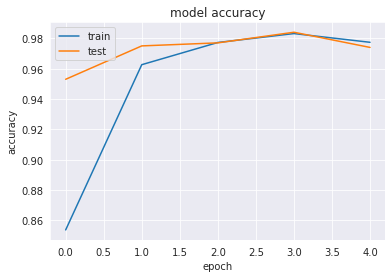

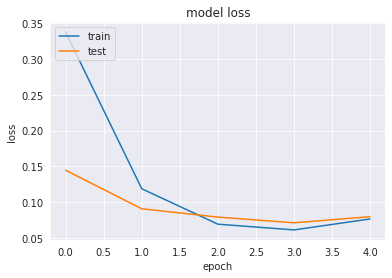

In [ ]:

# Summarize history for accuracy
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
lstm_w2v_mdl_load = keras.models.load_model('LSTM_w2v_model_final.h5')


Accuracy: 0.971
Training Score: 0.986
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.971
Precision: 0.985
Recall: 0.955
F1-Score: 0.97

Classification Report:


,precision,recall,f1-score,support
0,0.957935,0.986220,0.971872,508.000
1,0.985325,0.955285,0.970072,492.000
accuracy,0.971000,0.971000,0.971000,0.971
macro avg,0.971630,0.970753,0.970972,1000.000
weighted avg,0.971411,0.971000,0.970987,1000.000


Confusion Matrix:


,Predicted: False,Predicted: True
False,501,7
True,22,470


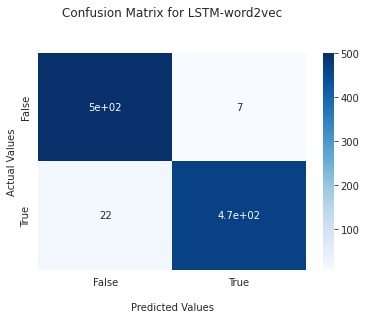

Random (chance) Prediction: AUROC = 0.500
LSTM-word2vec: AUROC = 0.997


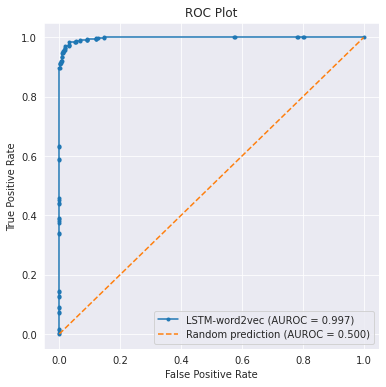

In [ ]:
# get the results for LSTM using word2vec
y_pred = lstm_w2v_mdl.predict(x_test_vec)
y_pred = np.where(y_pred > 0.5, 1, 0)
model_scores = model_scores.append(evaluate_model_metrics(

    "LSTM-word2vec", x_train_vec, x_test_vec, Y_train, Y_test, y_pred, lstm_w2v_mdl), ignore_index=True)


In [ ]:
model_scores


,model,accuracy,training_score,roc_auc,precision,recall,f1_score
0,Random Forest TF-IDF,0.864,0.874,0.865,0.820,0.930,0.872
1,Random Forest TF-IDF Optimized,0.874,0.883,0.874,0.834,0.929,0.879
2,Naive Bayes TF-IDF,0.948,0.946,0.948,0.979,0.915,0.946
3,Naive Bayes TF-IDF Optimized,0.960,0.966,0.960,0.985,0.934,0.959
4,LSTM - Custom Vocab Ranking,0.962,0.980,0.963,0.967,0.958,0.962
5,LSTM-word2vec,0.971,0.986,0.971,0.985,0.955,0.970


### LSTM Model USING WORD2VEC+BIGRAMS

In [ ]:
# Run the code for vectorising text from previous section
# Extracting Word2vec parameters for bigrams
w2vbigram_model = gensim.models.Word2Vec.load(
    "word2vec_mod_final_w2vbigram.model")  # Loading word2vec model
print(type(w2vbigram_model))
pretrained_weights = w2vbigram_model.wv.vectors
vocab_size_b, emdedding_size_b = pretrained_weights.shape
print(pretrained_weights.shape)


<class 'gensim.models.word2vec.Word2Vec'>
(23639, 100)


In [ ]:
# Loading the pickled LSTM model using word2vec for bigrams if it already exists
import pickle5
if os.path.exists('LSTM_w2vbigram_model_final.h5'):
    print('Loading the pre trained model from pickle')
    lstm_w2vph_mdl = keras.models.load_model('LSTM_w2vbigram_model_final.h5')
    with open("LSTM_w2vbigram_modelb32e4d7d5.pkl", "rb") as fh:
        values = pickle5.load(fh)
    print('Model and values loaded successfully')
else:
    print('Training the LSTM model: ')
    lstm_w2vph_mdl = Sequential()
    lstm_w2vph_mdl.add(Embedding(input_dim=vocab_size_b, output_dim=emdedding_size_b, weights=[
                       pretrained_weights], input_length=4000))  # Adding the word2vec weights
    lstm_w2vph_mdl.add(Dropout(0.7))
    lstm_w2vph_mdl.add(LSTM(units=emdedding_size_b))
    lstm_w2vph_mdl.add(Dropout(0.5))  # To prevent overfitting
    lstm_w2vph_mdl.add(Dense(1, activation='sigmoid'))
    lstm_w2vph_mdl.compile(
        optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    values = lstm_w2vph_mdl.fit(
        x_train_vec, Y_train, epochs=4, batch_size=32, validation_data=(x_cv_vec, Y_valid))
    with open("LSTM_w2vbigram_modelb32e4d7d5.pkl", "wb") as f:  # storing values
        pickle.dump(values.history, f)
    # Pickling the newly trained model
    lstm_w2vph_mdl.save('LSTM_w2vbigram_model_final.h5')


Loading the pre trained model from pickle
Model and values loaded successfully


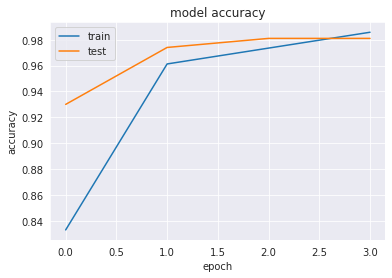

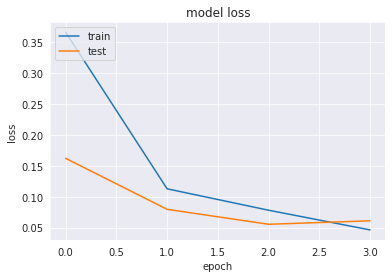

In [ ]:

# Summarize history for accuracy
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Accuracy: 0.982
Training Score: 0.993
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.982
Precision: 0.98
Recall: 0.984
F1-Score: 0.982

Classification Report:


,precision,recall,f1-score,support
0,0.984190,0.980315,0.982249,508.000
1,0.979757,0.983740,0.981744,492.000
accuracy,0.982000,0.982000,0.982000,0.982
macro avg,0.981973,0.982027,0.981996,1000.000
weighted avg,0.982009,0.982000,0.982001,1000.000


Confusion Matrix:


,Predicted: False,Predicted: True
False,498,10
True,8,484


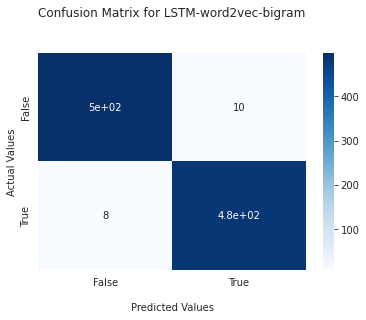

Random (chance) Prediction: AUROC = 0.500
LSTM-word2vec-bigram: AUROC = 0.998


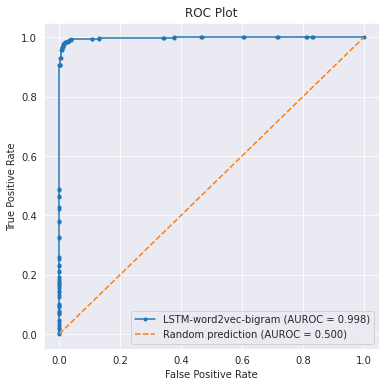

In [ ]:
# from sklearn.metrics import roc_curve,roc_auc_score,precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
y_pred = lstm_w2vph_mdl.predict(x_test_vec)
y_pred = np.where(y_pred > 0.5, 1, 0)
model_scores = model_scores.append(evaluate_model_metrics(

    "LSTM-word2vec-bigram", x_train_vec, x_test_vec, Y_train, Y_test, y_pred, lstm_w2vph_mdl), ignore_index=True)


## RESULT ANALYSIS

In [ ]:
model_scores.sort_values(by='roc_auc', ascending=False)


,model,accuracy,training_score,roc_auc,precision,recall,f1_score
6,LSTM-word2vec-bigram,0.982,0.993,0.982,0.980,0.984,0.982
5,LSTM-word2vec,0.971,0.986,0.971,0.985,0.955,0.970
4,LSTM - Custom Vocab Ranking,0.962,0.980,0.963,0.967,0.958,0.962
3,Naive Bayes TF-IDF Optimized,0.960,0.966,0.960,0.985,0.934,0.959
2,Naive Bayes TF-IDF,0.948,0.946,0.948,0.979,0.915,0.946
1,Random Forest TF-IDF Optimized,0.874,0.883,0.874,0.834,0.929,0.879
0,Random Forest TF-IDF,0.864,0.874,0.865,0.820,0.930,0.872


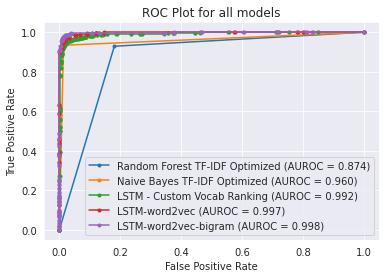

In [ ]:
for r in roc_auc_models:
    name, rf_fpr, rf_tpr, rf_auc = r[0], r[1], r[2], r[3]
    if name not in ["Naive Bayes TF-IDF", "Random Forest TF-IDF"]:
        plt.plot(rf_fpr, rf_tpr, marker=".",
                 label=name+" (AUROC = %0.3f)" % rf_auc)
plt.title("ROC Plot for all models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# Conclusion
This coursework helped us to implement traditional machine learning methods and deep learning models to understand how they work with text data classification. First, we implemented the traditional models with TF-IDF and moved on to deep learning model with word2vec. We can conclude that LSTM with word2vec and bigrams is the best performing model. In general, all the LSTM models performed better than the traditional models. We expected LSTM models to perform better but we did not expect the traditional models to work almost as well as LSTM. This may just be so for only the given dataset, the results may be more prominent for other text-based datasets.
Some of the issues we have faced are version issues across 8 students working on the same project, thread errors and mainly memory issues while we ran huge models like LSTM. 
A particular source of error on our project could the delta error adding up as we are over running model over model (for example any error in word embedding will carry over in the model and the model will have some level of delta error on its own.)
Some improvements or other techniques we could have done to improve are spelling check and language check. The reason we did not do them was because we assumed it would have already been done by the news agencies before publishing. We could have explored different word2vec models from different open sources such fasttext, GLoVe etc. We are also interested to learn about any other improvements from the feedback we receive for this coursework.
